# Libraries

In [118]:
!pip install -q "tensorflow_gpu>=2.0.0"
!pip install -q transformers
!pip install -q ktrain 
!pip3 install -q tornado==5

ERROR: tensorflow 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.3.0 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
ERROR: tensorflow-probability 0.10.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-gpu 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-gpu 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow-gpu 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.

In [120]:
import eli5
import ktrain
import pandas as pd
import seaborn as sns
from ktrain import text
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Dataset

In [121]:
input_path = '../input/books-data.csv'

In [122]:
input = pd.read_csv(input_path)

In [123]:
input = input.fillna(" ")

In [124]:
len(input)

13800

In [125]:
input.head(10)

,Unnamed: 0,title,category,description,author,rating,gbooks-link,info-link,volume-link,isbn,image,tag
0,0,Quantum Physics,Science,"""In question & answer format, discusses the hi...",Michael Raymer,-1.0,,http://books.google.com/books?id=XSbVDgAAQBAJ&...,https://books.google.com/books/about/Quantum_P...,9.78019e+12,http://books.google.com/books/content?id=XSbVD...,quantum;physics
1,1,An Introduction to Quantum Physics,Science,This modern textbook offers an introduction to...,Stefanos Trachanas,-1.0,,http://books.google.com/books?id=G49FDwAAQBAJ&...,https://books.google.com/books/about/An_Introd...,9.78353e+12,http://books.google.com/books/content?id=G49FD...,quantum;physics
2,2,Quantum Physics in One Dimension,Literary Criticism,This volume presents in a pedagogical yet comp...,Thierry Giamarchi,-1.0,,http://books.google.com/books?id=1MwTDAAAQBAJ&...,https://books.google.com/books/about/Quantum_P...,9.7802e+12,http://books.google.com/books/content?id=1MwTD...,quantum;physics
3,3,Compendium of Quantum Physics,Science,With contributions by leading quantum physicis...,Daniel Greenberger;Klaus Hentschel;Friedel Wei...,-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78354e+12,http://books.google.com/books/content?id=ekyAV...,quantum;physics
4,4,Quantum Physics and Theology,Religion,"Three decades ago, federal policymakers - Repu...",J. C. Polkinghorne,5.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.7803e+12,http://books.google.com/books/content?id=13fzs...,quantum;physics
5,5,Quantum Physics in Minutes,Science,Quantum physics is the most fundamental -- but...,Gemma Lavender,-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78168e+12,http://books.google.com/books/content?id=kiEmD...,quantum;physics
6,6,Quantum Physics for Beginners,Science,The textbook covers the background theory of v...,Zbigniew Ficek,-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78114e+12,http://books.google.com/books/content?id=kFKzD...,quantum;physics
7,7,Quantum Physics,Science,This brilliantly innovative textbook is intend...,John S. Townsend,-1.0,,http://books.google.com/books?id=7PxAAQAAIAAJ&...,https://books.google.com/books/about/Quantum_P...,,http://books.google.com/books/content?id=7PxAA...,quantum;physics
8,8,An Introduction to a Realistic Quantum Physics,Science,"Dr. Preparata (d. 2000), a professor at an uns...",Giuliano Preparata,4.0,,http://books.google.com/books?id=tzYC0KAJot4C&...,https://books.google.com/books/about/An_Introd...,9.78981e+12,http://books.google.com/books/content?id=tzYC0...,quantum;physics
9,9,Quantum Physics,Science,This textbook is intended to accompany a two-s...,A.I Lvovsky,-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78366e+12,http://books.google.com/books/content?id=NZZaD...,quantum;physics


In [126]:
input['text'] = input.title + " " + input.author + " " + input.description

In [127]:
input[input['text'].isnull()]

,Unnamed: 0,title,category,description,author,rating,gbooks-link,info-link,volume-link,isbn,image,tag,text


In [128]:
input.head()

,Unnamed: 0,title,category,description,author,rating,gbooks-link,info-link,volume-link,isbn,image,tag,text
0,0,Quantum Physics,Science,"""In question & answer format, discusses the hi...",Michael Raymer,-1.0,,http://books.google.com/books?id=XSbVDgAAQBAJ&...,https://books.google.com/books/about/Quantum_P...,9.78019e+12,http://books.google.com/books/content?id=XSbVD...,quantum;physics,"Quantum Physics Michael Raymer ""In question & ..."
1,1,An Introduction to Quantum Physics,Science,This modern textbook offers an introduction to...,Stefanos Trachanas,-1.0,,http://books.google.com/books?id=G49FDwAAQBAJ&...,https://books.google.com/books/about/An_Introd...,9.78353e+12,http://books.google.com/books/content?id=G49FD...,quantum;physics,An Introduction to Quantum Physics Stefanos Tr...
2,2,Quantum Physics in One Dimension,Literary Criticism,This volume presents in a pedagogical yet comp...,Thierry Giamarchi,-1.0,,http://books.google.com/books?id=1MwTDAAAQBAJ&...,https://books.google.com/books/about/Quantum_P...,9.7802e+12,http://books.google.com/books/content?id=1MwTD...,quantum;physics,Quantum Physics in One Dimension Thierry Giama...
3,3,Compendium of Quantum Physics,Science,With contributions by leading quantum physicis...,Daniel Greenberger;Klaus Hentschel;Friedel Wei...,-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78354e+12,http://books.google.com/books/content?id=ekyAV...,quantum;physics,Compendium of Quantum Physics Daniel Greenberg...
4,4,Quantum Physics and Theology,Religion,"Three decades ago, federal policymakers - Repu...",J. C. Polkinghorne,5.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.7803e+12,http://books.google.com/books/content?id=13fzs...,quantum;physics,Quantum Physics and Theology J. C. Polkinghorn...


In [129]:
len(input['tag'].unique())

99

In [130]:
label_list = input['tag'].unique()

In [131]:
label_list

array(['quantum;physics', 'relativity;physics', 'electricity;physics',
       'mechanics;physics', 'architecture;physics', 'civil;physics',
       'aeronautic;physics', 'optics;physics', 'waves;physics',
       'electronics;physics', 'calculus;mathematics',
       'abstract-algebra;mathematics', 'geometry;mathematics',
       'coordinate-geometry;mathematics', 'topology;mathematics',
       'measure-theory;mathematics', 'algebra;mathematics',
       'combinatorics;mathematics', 'probability;mathematics',
       'computational-math;mathematics', 'number-theory;mathematics',
       'fiction;literature', 'non-fiction;literature',
       'biography;literature', 'crime;literature', 'adventure;literature',
       'childrens;literature', 'romance;literature',
       'classics;literature', 'horror;literature', 'language;literature',
       'comedy;literature', 'motivation-advice;self-help',
       'meditation-peace;self-help', 'love;self-help', 'death;self-help',
       'war;self-help', 'abuse

### Visualization of number of books per tag

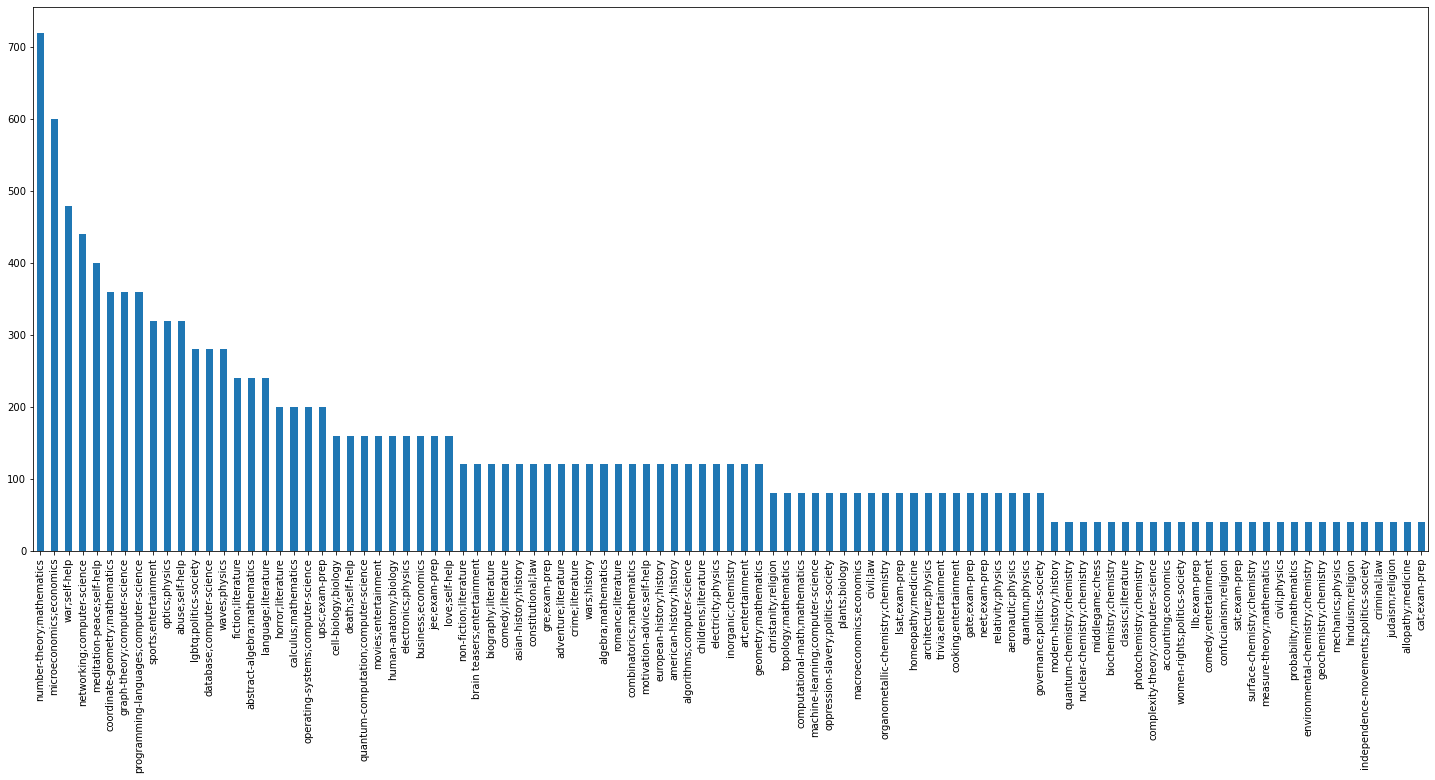

In [79]:
plt.figure(figsize = (25,10))
pd.value_counts(input['tag']).plot(kind="bar")

# Train-Val Split

In [132]:
train, val =  train_test_split(input, test_size = 0.2, random_state = 100)

In [133]:
len(train['tag'].unique())

99

In [134]:
len(val['tag'].unique())

99

In [135]:
len(train)

11040

In [136]:
len(val)

2760

In [137]:
train.head(10)

,Unnamed: 0,title,category,description,author,rating,gbooks-link,info-link,volume-link,isbn,image,tag,text
11154,34,Cultural Governance and Resistance in Pacific ...,Political Science,This text examines the politics of culture and...,William A. Callahan,-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78113e+12,http://books.google.com/books/content?id=Z69_A...,governance;politics-society,Cultural Governance and Resistance in Pacific ...
7573,333,Reactive Programming in Kotlin,Computers,Learn how to implement Reactive Programming pa...,Rivu Chakraborty,-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78179e+12,http://books.google.com/books/content?id=ZMxPD...,programming-languages;computer-science,Reactive Programming in Kotlin Rivu Chakrabort...
6840,40,IP Address Management,Computers,This book will be the first covering the subje...,Timothy Rooney,-1.0,,http://books.google.com/books?id=enGhDwAAQBAJ&...,https://books.google.com/books/about/IP_Addres...,9.78047e+12,http://books.google.com/books/content?id=enGhD...,networking;computer-science,IP Address Management Timothy Rooney This book...
116,36,FUNDAMENTALS OF SPECIAL AND GENERAL RELATIVITY...,Science,"Relativity, apart from quantum mechanics, is t...","KRORI, K. D.",-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78939e+12,http://books.google.com/books/content?id=RtKmD...,relativity;physics,FUNDAMENTALS OF SPECIAL AND GENERAL RELATIVITY...
244,84,"Physics for Scientists and Engineers, Volume 2...",Physics,,Paul Allen Tipler,5.0,,http://books.google.com/books?id=R2Nuh3Ux1AwC&...,https://books.google.com/books/about/Physics_f...,9.78072e+12,http://books.google.com/books/content?id=R2Nuh...,electricity;physics,"Physics for Scientists and Engineers, Volume 2..."
1867,27,Coordinate Geometry,Algebra,,Anthony Nicolaides,-1.0,,http://books.google.com/books?id=xGciFVc7n-oC&...,https://books.google.com/books/about/Coordinat...,9.78187e+12,http://books.google.com/books/content?id=xGciF...,coordinate-geometry;mathematics,Coordinate Geometry Anthony Nicolaides
1595,115,Advanced Linear Algebra,Mathematics,Designed for advanced undergraduate and beginn...,Nicholas Loehr,-1.0,,http://books.google.com/books?id=5Vc-AwAAQBAJ&...,https://books.google.com/books/about/Advanced_...,9.78147e+12,http://books.google.com/books/content?id=5Vc-A...,abstract-algebra;mathematics,Advanced Linear Algebra Nicholas Loehr Designe...
4112,112,Restoring the Mystery of the Rainbow,Belief and doubt in literature,"""Keats' misgivings about science unweaving the...",Valeria Tinkler-Villani;C. C. Barfoot,-1.0,,http://books.google.com/books?id=ozOIzQEACAAJ&...,https://books.google.com/books/about/Restoring...,,,adventure;literature,Restoring the Mystery of the Rainbow Valeria T...
7509,269,Native Mobile Development,Computers,Learn how to make mobile native app developmen...,Shaun Lewis;Mike Dunn,-1.0,,https://play.google.com/store/books/details?id...,https://play.google.com/store/books/details?id...,9.78149e+12,http://books.google.com/books/content?id=Q8C9D...,programming-languages;computer-science,Native Mobile Development Shaun Lewis;Mike Dun...
8165,165,Computer Science -- Theory and Applications,Computers,The LNCS series reports state-of-the-art resul...,Farid Ablayev;Ernst W. Mayr,-1.0,,http://books.google.com/books?id=aOvVghsSJ3AC&...,https://books.google.com/books/about/Computer_...,9.78364e+12,http://books.google.com/books/content?id=aOvVg...,graph-theory;computer-science,Computer Science -- Theory and Applications Fa...


In [138]:
val_copy = val

# Preprocess Data & Create Transformer

In [139]:
MAX_LEN = 200
BATCH_SIZE = 6

In [140]:
train_text = train.text.tolist()
val_text = val.text.tolist()

In [141]:
train_tag = train.tag.tolist()
val_tag = val.tag.tolist()

In [142]:
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=MAX_LEN, classes=label_list)
trn = t.preprocess_train(train_text, train_tag)
val = t.preprocess_test(val_text, val_tag)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=BATCH_SIZE)

/opt/conda/lib/python3.7/site-packages/ktrain/text/preprocessor.py:399: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 117
	95percentile : 309
	99percentile : 452


/opt/conda/lib/python3.7/site-packages/ktrain/text/preprocessor.py:525: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 118
	95percentile : 310
	99percentile : 461


# Train

In [143]:
LR = 5e-5
EPOCHS = 10

In [144]:
history = learner.autofit(LR, EPOCHS)



begin training using triangular learning rate policy with max lr of 5e-05...
Train for 1840 steps, validate for 87 steps
Epoch 1/10
1840/1840 [==============================] - 213s 116ms/step - loss: 2.5302 - accuracy: 0.4096 - val_loss: 1.3509 - val_accuracy: 0.6543
Epoch 2/10
1840/1840 [==============================] - 199s 108ms/step - loss: 1.1121 - accuracy: 0.6989 - val_loss: 0.9304 - val_accuracy: 0.7467
Epoch 3/10
1840/1840 [==============================] - 199s 108ms/step - loss: 0.7436 - accuracy: 0.7961 - val_loss: 0.8047 - val_accuracy: 0.7815
Epoch 4/10
1840/1840 [==============================] - 199s 108ms/step - loss: 0.5558 - accuracy: 0.8419 - val_loss: 0.7835 - val_accuracy: 0.7917
Epoch 5/10
1840/1840 [==============================] - 199s 108ms/step - loss: 0.4315 - accuracy: 0.8713 - val_loss: 0.8162 - val_accuracy: 0.7917
Epoch 6/10
1840/1840 [==============================] - 198s 108ms/step - loss: 0.3643 - accuracy: 0.8935 - val_loss: 0.7978 - val_accura

# Plot model history

## Plot Loss

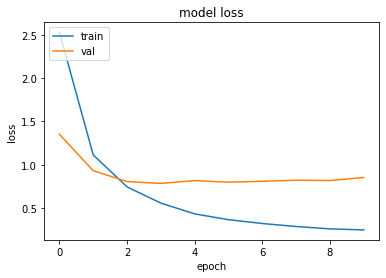

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Plot Accuracy

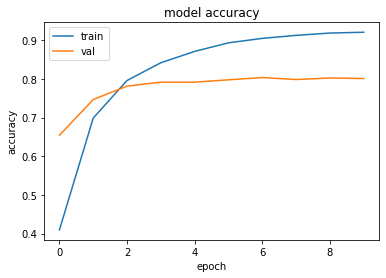

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Confusion Matrix

In [147]:
a = t.get_classes()

In [148]:
conf = learner.validate(class_names = a)

                                         precision    recall  f1-score   support

           abstract-algebra;mathematics       0.87      0.98      0.92        48
                        abuse;self-help       0.92      0.87      0.89        63
                   accounting;economics       0.71      0.62      0.67         8
                   adventure;literature       0.74      0.61      0.67        28
                     aeronautic;physics       0.29      0.18      0.22        11
                    algebra;mathematics       0.80      0.61      0.69        33
            algorithms;computer-science       0.76      0.64      0.70        25
                     allopathy;medicine       0.71      0.71      0.71        14
               american-history;history       0.40      0.32      0.35        19
                   architecture;physics       0.75      0.69      0.72        13
                      art;entertainment       0.67      0.72      0.69        25
                  asian-his

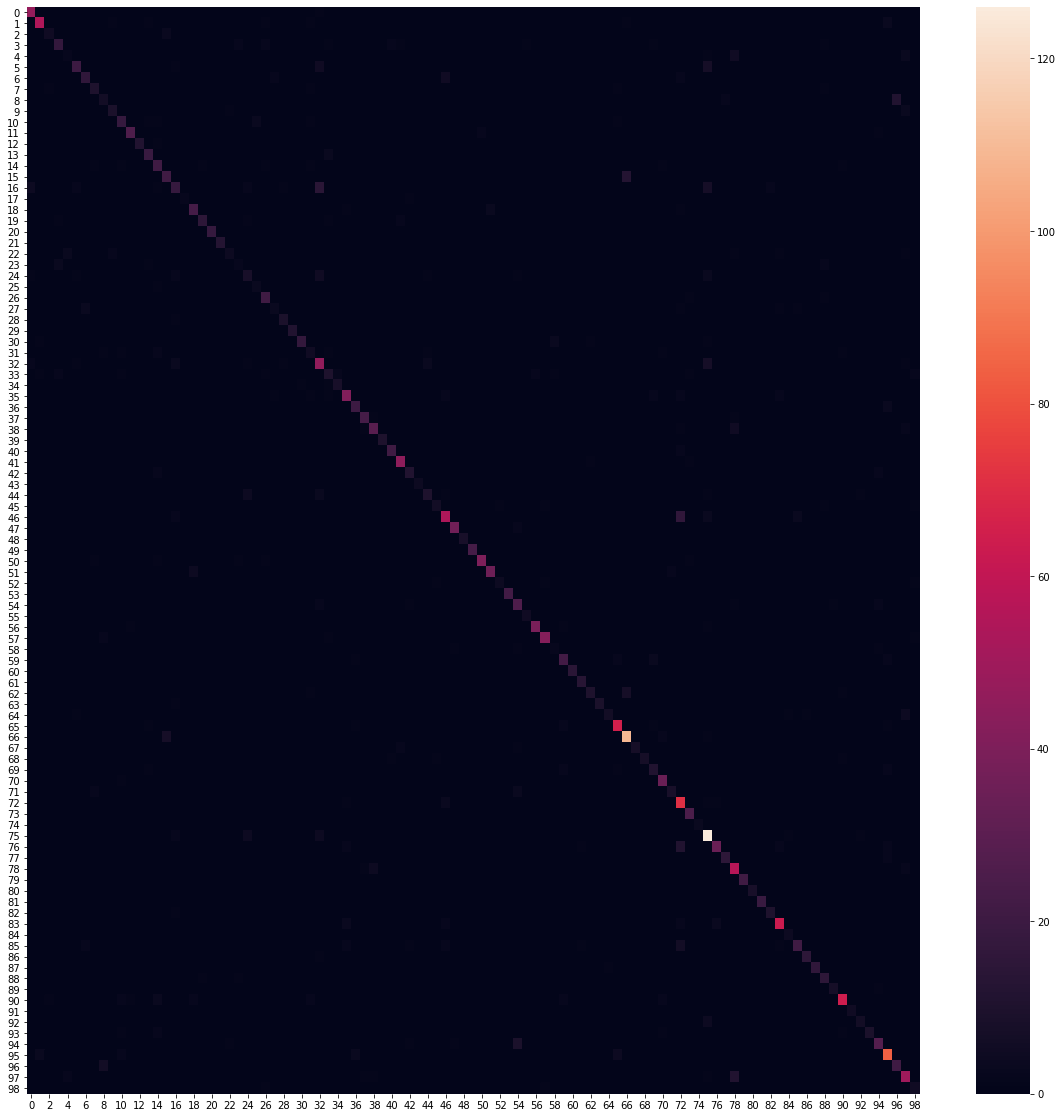

In [149]:
plt.figure(figsize = (20,20))
sns.heatmap(conf)

## Let's See where our model fails most in the validation set

In [150]:
learner.view_top_losses(n=10, preproc=t)

----------
id:203 | loss:13.95 | true:asian-history;history | pred:horror;literature)

----------
id:1744 | loss:13.95 | true:asian-history;history | pred:horror;literature)

----------
id:955 | loss:13.12 | true:combinatorics;mathematics | pred:jee;exam-prep)

----------
id:522 | loss:12.26 | true:cell-biology;biology | pred:database;computer-science)

----------
id:537 | loss:11.91 | true:operating-systems;computer-science | pred:war;self-help)

----------
id:965 | loss:11.3 | true:probability;mathematics | pred:calculus;mathematics)

----------
id:479 | loss:11.17 | true:civil;physics | pred:programming-languages;computer-science)

----------
id:330 | loss:11.17 | true:operating-systems;computer-science | pred:war;self-help)

----------
id:2624 | loss:10.89 | true:romance;literature | pred:childrens;literature)

----------
id:999 | loss:10.76 | true:language;literature | pred:love;self-help)



# Predictions

In [151]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [152]:
predictor.predict("harry potter")

'fiction;literature'

# Explain prediction

## Correct prediction

In [162]:
check = val_copy.iloc[10]

In [163]:
check

Unnamed: 0                                                    54
title                                               Ordering Law
category                                                 History
description    Over the last thirty years, historical studies...
author                                              Clare Graham
rating                                                        -1
gbooks-link                                                     
info-link      http://books.google.com/books?id=RgskDwAAQBAJ&...
volume-link    https://books.google.com/books/about/Ordering_...
isbn                                                 9.78135e+12
image          http://books.google.com/books/content?id=RgskD...
tag                                           constitutional;law
text           Ordering Law Clare Graham Over the last thirty...
Name: 12574, dtype: object

### True tag

In [164]:
check.tag

'constitutional;law'

### Predicted tag

In [165]:
predictor.predict(check.text)

'constitutional;law'

### Explanation

In [166]:
predictor.explain(check.text)

## Wrong prediction

In [155]:
check = val_copy.iloc[2123]

In [156]:
check

Unnamed: 0                                                   146
title                      Ancient Indian Leaps into Mathematics
category                                             Mathematics
description    This book presents contributions of mathematic...
author                                      B.S. Yadav;Man Mohan
rating                                                        -1
gbooks-link                                                     
info-link      https://play.google.com/store/books/details?id...
volume-link    https://play.google.com/store/books/details?id...
isbn                                                 9.78082e+12
image          http://books.google.com/books/content?id=nwrw0...
tag                                          language;literature
text           Ancient Indian Leaps into Mathematics B.S. Yad...
Name: 4746, dtype: object

### True tag

In [157]:
check.tag

'language;literature'

### Predicted tag

In [158]:
predictor.predict(check.text)

'number-theory;mathematics'

### Explanation

In [159]:
predictor.explain(check.text)

# Save Model

In [160]:
predictor.save('model')